![](https://www.santander.co.uk/themes/custom/santander_web18/logo.svg)

[image-source](https://www.santander.co.uk/themes/custom/santander_web18/logo.svg)



## Main outline

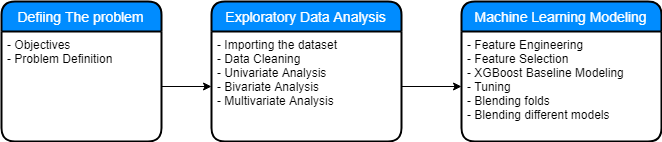

## Exploratory Data Analysis

![](http://blog.k2analytics.co.in/wp-content/uploads/2016/12/Exploratory_Data_Analysis.png)

[image-source](http://blog.k2analytics.co.in/wp-content/uploads/2016/12/Exploratory_Data_Analysis.png)

### Importing the dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import gc

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
sub = pd.read_csv('../input/sample_submission.csv')

In [3]:
train.shape, test.shape, sub.shape

((200000, 202), (200000, 201), (200000, 2))

In [4]:
train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

At first glance we have many uncharacterized numerical features, their names has the prefix "var_" and they are 200 in numbers. There are so many variables that some histograms will shed light to their numerical appearance.

In [5]:
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

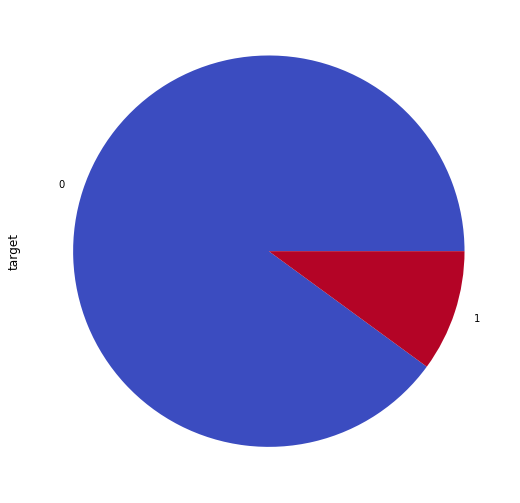

In [6]:
train['target'].value_counts().plot(kind="pie", figsize=(12,9), colormap="coolwarm")

Here we have a typical imbalanced dataset.

#### check for missing data

In [7]:
train.isna().sum().sum()

0

In [8]:
test.isna().sum().sum()

0

We have no NA values which is very nice!!

#### Splitting the numerical features

In [9]:
train.describe()
gc.collect();

In [10]:
numerical_features = train.columns[2:]

Distributions columns


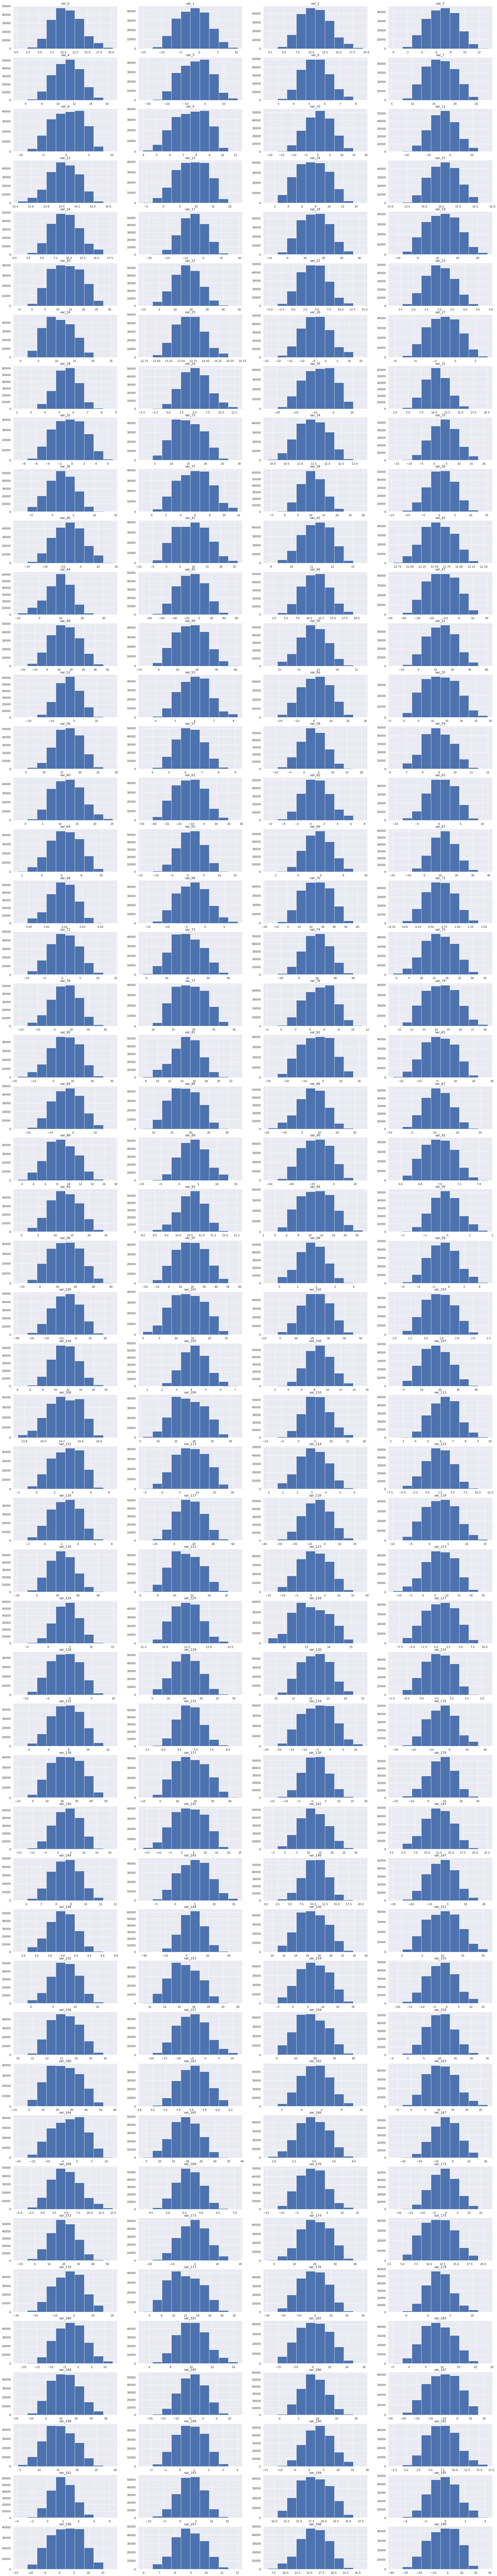

In [25]:
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(train[col]) 
    plt.title(col)
gc.collect();

Almost all features shows a normal distribution shape. Lets see the distributions for for all numerical features per each class.

Distributions columns


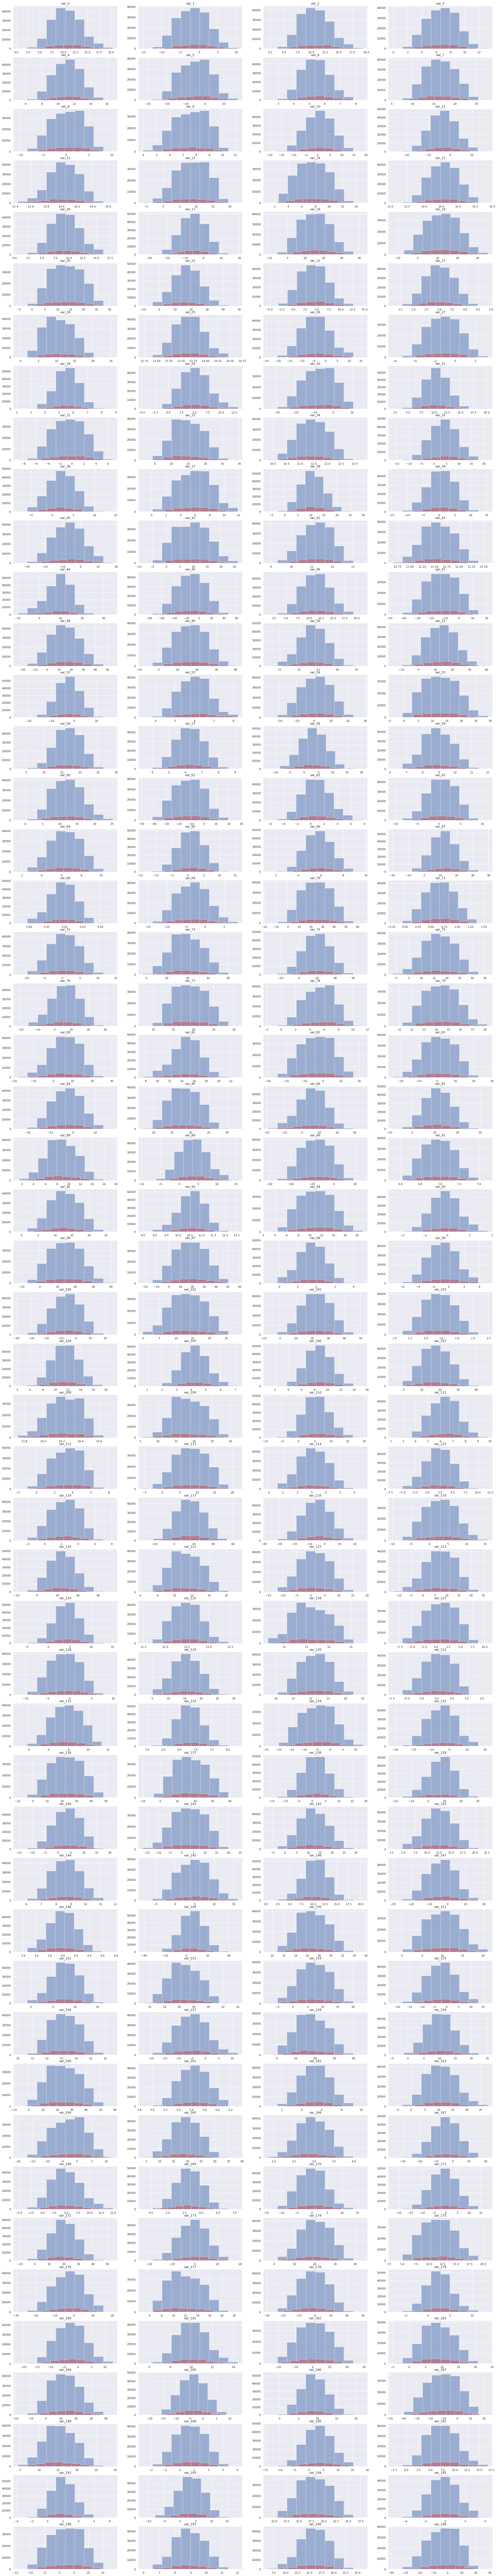

In [24]:
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(train[train["target"] == 0][col], alpha=0.5, label='0', color='b')
    plt.hist(train[train["target"] == 1][col], alpha=0.5, label='1', color='r')    
    plt.title(col)
gc.collect();

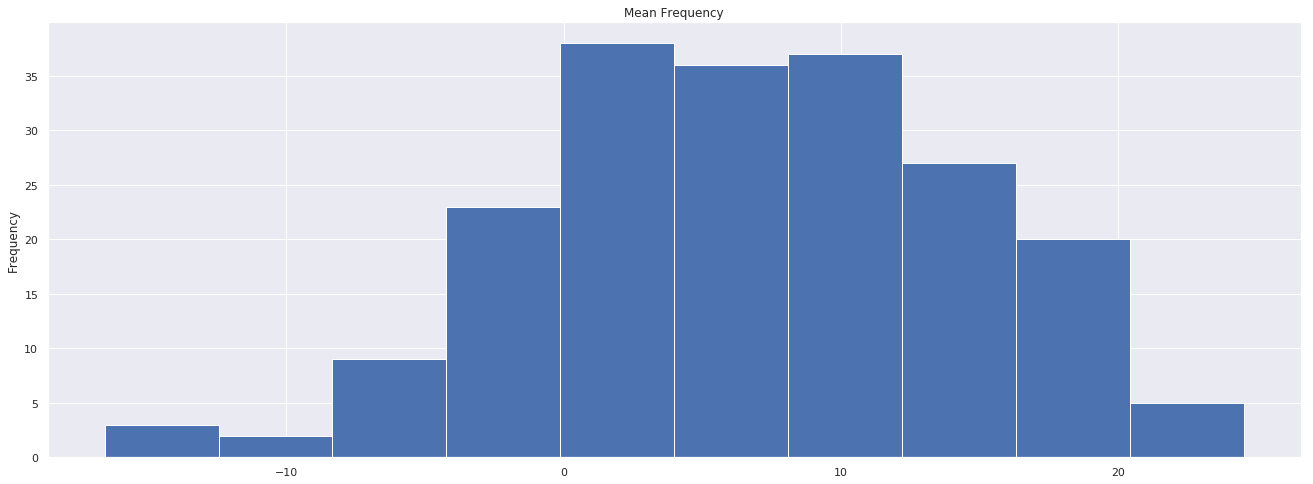

In [27]:
plt.figure(figsize=(20, 8))
train[numerical_features].mean().plot('hist');
plt.title('Mean Frequency');

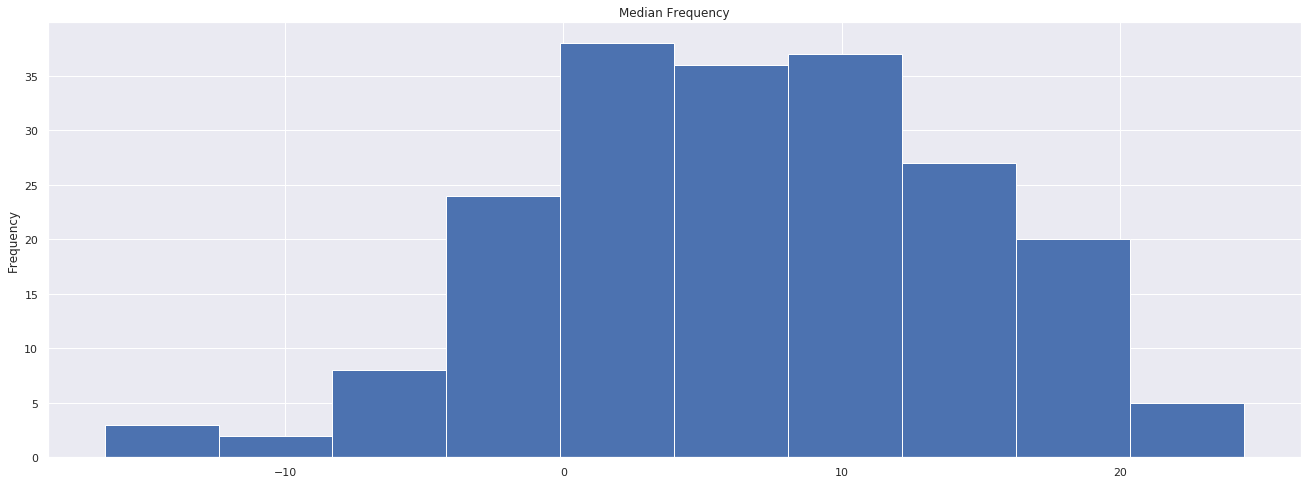

In [31]:
plt.figure(figsize=(20, 8))
train[numerical_features].median().plot('hist');
plt.title('Median Frequency');

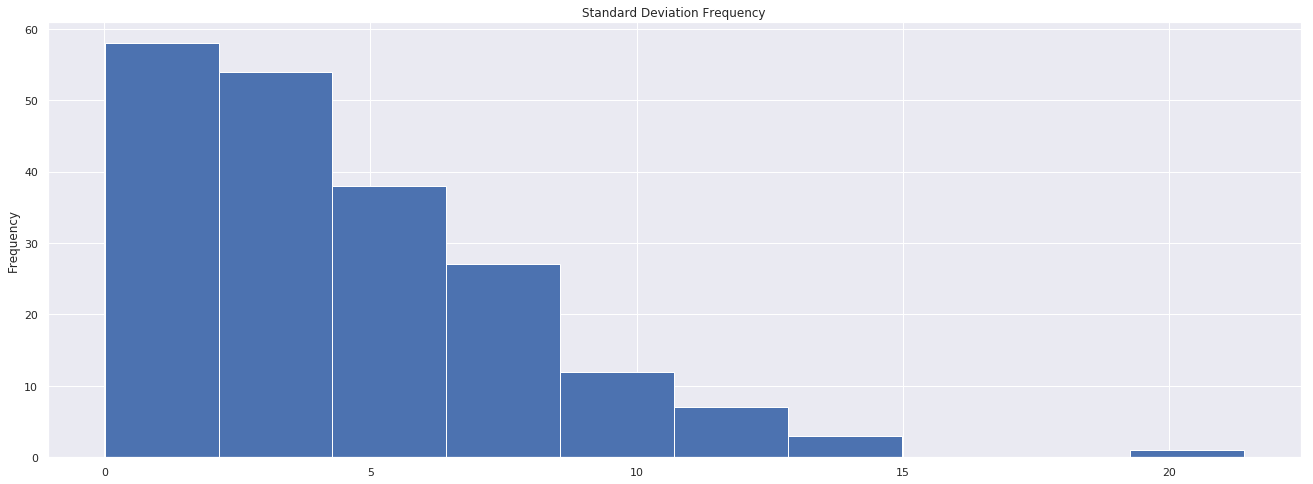

In [28]:
plt.figure(figsize=(20, 8))
train[numerical_features].std().plot('hist');
plt.title('Standard Deviation Frequency');

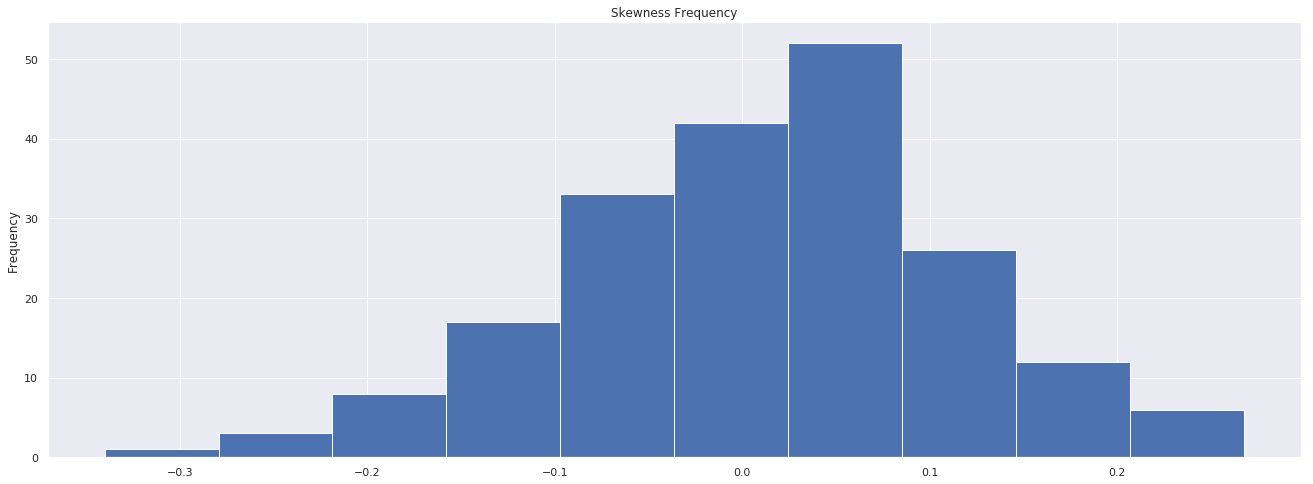

In [32]:
plt.figure(figsize=(20, 8))
train[numerical_features].skew().plot('hist');
plt.title('Skewness Frequency');

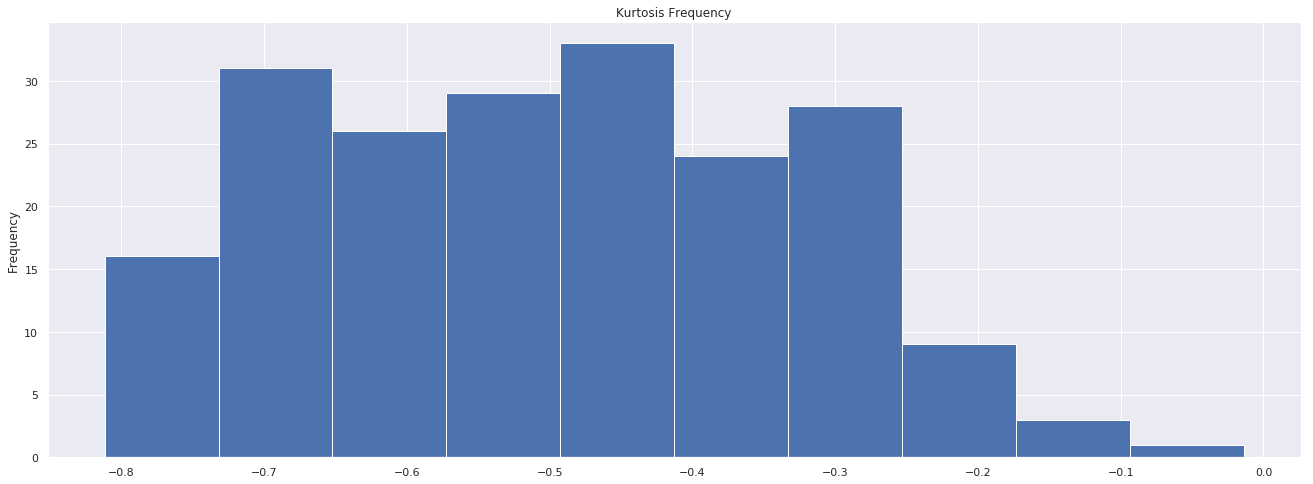

In [33]:
plt.figure(figsize=(20, 8))
train[numerical_features].kurt().plot('hist');
plt.title('Kurtosis Frequency');

#### correlations between numerical data

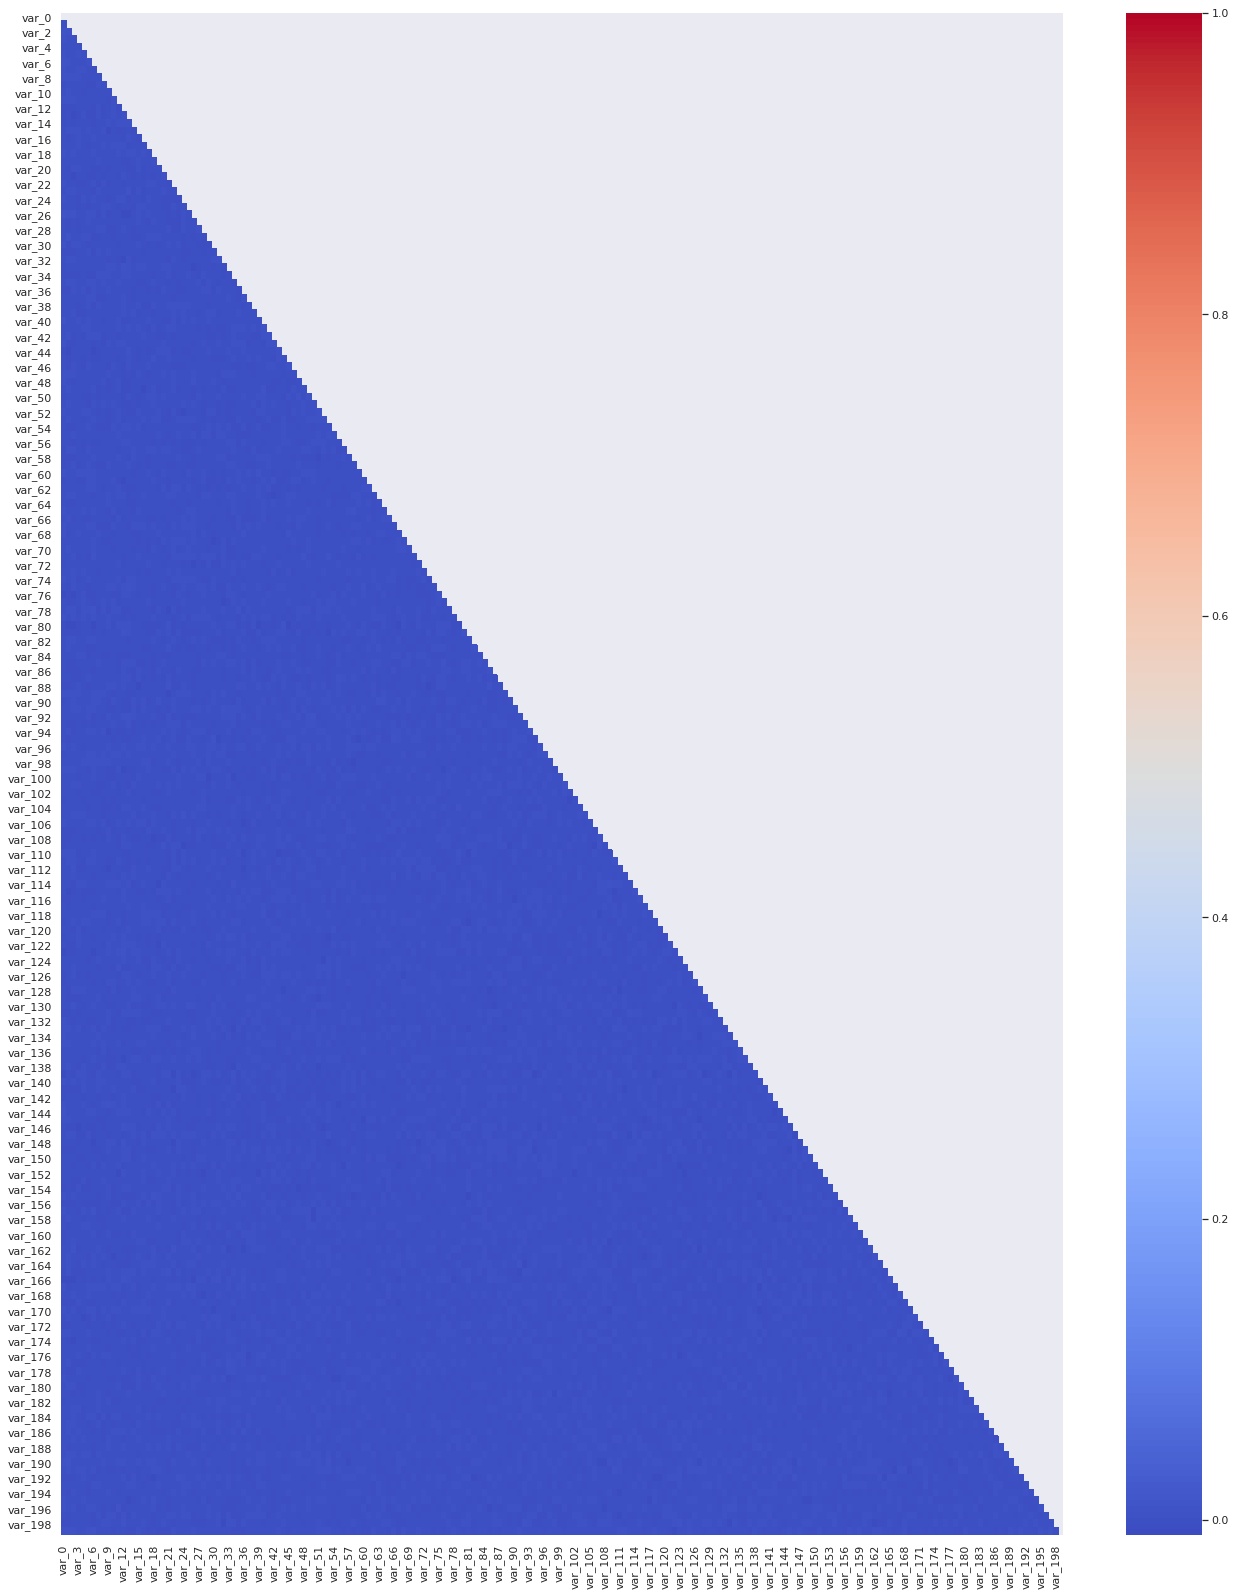

In [16]:
sns.set(rc={'figure.figsize':(20,28)})

# Compute the correlation matrix
corr = train[numerical_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            #annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')

the figure above shows that most of the pearson correlations between the numerical data are close to zero, in fact is between 0 and 0.2. That means that most of the numerical data are almost uncorrelated between them.

#### Most correlated features:

In [41]:
s = corr.unstack().drop_duplicates()
so = s.sort_values(kind="quicksort")
so = so.drop_duplicates()

print("Top most highly positive correlated features:")
print(so[(so<1) & (so>0.5)].sort_values(ascending=False))

print()

print("Top most highly megative correlated features:")
print(so[(so < - 0.005)])

Top most highly positive correlated features:
Series([], dtype: float64)

Top most highly megative correlated features:
var_26   var_139   -0.009844
var_53   var_148   -0.009788
var_6    var_80    -0.008958
var_1    var_80    -0.008855
var_2    var_13    -0.008795
var_81   var_155   -0.008601
var_127  var_162   -0.008555
var_54   var_179   -0.008394
var_26   var_72    -0.008062
var_34   var_133   -0.008020
var_10   var_163   -0.008002
var_2    var_80    -0.007989
var_148  var_195   -0.007932
var_34   var_138   -0.007869
var_50   var_157   -0.007859
var_67   var_169   -0.007842
var_12   var_99    -0.007828
var_91   var_165   -0.007819
var_166  var_191   -0.007798
var_139  var_170   -0.007749
         var_155   -0.007554
var_26   var_166   -0.007532
var_111  var_197   -0.007517
var_169  var_191   -0.007492
var_177  var_179   -0.007454
var_0    var_123   -0.007402
var_162  var_198   -0.007391
var_32   var_198   -0.007375
var_18   var_192   -0.007355
var_0    var_166   -0.007269
          

### EDA Summary

- We have 200 features that are mostly uncorrelated between them
- 200 numerical features that their histograms have a shape like the one of a normal distribution

## Machine Learning Modeling

![](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)
[image-source](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)

### Feature Engineering

In [43]:
for df in [test, train]:
    df['sum'] = df[numerical_features].sum(axis=1)  
    df['min'] = df[numerical_features].min(axis=1)
    df['max'] = df[numerical_features].max(axis=1)
    df['mean'] = df[numerical_features].mean(axis=1)
    df['std'] = df[numerical_features].std(axis=1)
    df['skew'] = df[numerical_features].skew(axis=1)
    df['kurt'] = df[numerical_features].kurtosis(axis=1)
    df['med'] = df[numerical_features].median(axis=1)

In [45]:
test_df = test.drop("ID_code", axis="columns")

In [50]:
y = train['target']
X = train.drop(['target', "ID_code"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time

# create a 70/30 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

import xgboost as xgb

start_time = time.time()

# special thanks to https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# these parameters have been found via xgboost tuning, you can see my tries in the commented tuning python snippets below:
# unfortunately it takes so much time to tune and to produce the final optimal classifier due to 9h time limit in Kaggle kernels.
clf_xgb = xgb.XGBClassifier(learning_rate=0.05, 
                            n_estimators=3000, 
                            max_depth=6,
                            min_child_weight=1,
                            gamma=0,
                            subsample=1,
                            colsample_bytree=1,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0,
                            reg_lambda = 1,
                            seed=42)

clf_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)

predictions = clf_xgb.predict(xvalid)

print()
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
predictions_probas = clf_xgb.predict_proba(xvalid)
print("roc-auc score", roc_auc_score(yvalid, predictions_probas[:,1]))

print()
print("elapsed time in seconds: ", time.time() - start_time)

print()
gc.collect()

[0]	validation_0-auc:0.652331	validation_1-auc:0.637725
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.908797	validation_1-auc:0.822941
[200]	validation_0-auc:0.954961	validation_1-auc:0.856101


In [ ]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, cmap="BrBG")

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

In [ ]:
sns.set(rc={'figure.figsize':(12, 18)})
xgb.plot_importance(clf_xgb, title='Feature importance', xlabel='F score', ylabel='Features')
gc.collect();

## Preparing for submmission

In [ ]:
submission = pd.read_csv('../input/sample_submission.csv')
submission['target'] = clf_xgb.predict(test_df)
submission.to_csv('xgboost.csv', index=False)